In [20]:
import numpy as np
from matplotlib import pyplot as plt

## Introducão teórica
---

### Métodos numéricos para Equacões DIferenciais Ordinárias

Seja uma EDO de primeira ordem geral:
$$
\bar{y'} =  f(t, \bar{y}), \\ y(0) = y_o
$$

#### Método de Euler Explicito
$$
y_{n+1} = y_n + \Delta t f_n
$$

#### Método de Euler Implícito
$$
y_{n+1} = y_n +\Delta t f_{n+1}
$$

#### Runge-Kutta de segunda ordem
$$
y_n+1 = y_n + \frac{1}{2} (k_1 + k_2) \\
k_1 = \Delta t f(t_n , y_n ) \\
k_2 = \Delta t f(t_n + \Delta t, y_n + k_1)
$$

#### Runge-Kutta de quarta ordem
$$
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2 k_3 + k_4),\\
k_1 = \Delta t f(t_n, y_n),\\
k_2 = \Delta t f ( t_n + \frac{\Delta t}{2}, y_n + \frac{k_1}{2}),\\
k_3 = \Delta t f ( t_n + \frac{\Delta t}{2}, y_n + \frac{k_2}{2}),\\
k_4 = \Delta t f ( t_n + \Delta t, y_n + k_3)
$$


In [24]:
'''iteração para determinar os valores de y'''
def explicit_euler(t, y,y_bar, dt= 0.1):
    
    erro =np.zeros(len(t))
    
    for k in range(len(t) - 1):
        # iteração para y_k+1 = (1 - dt) * y_k
        y[k + 1] = (1. - dt) * y[k]
        # calculo do erro de truncamento erro = |y - y_bar|
        erro[k] = np.abs(y[k] - y_bar(t)[k])

        # print(f'Tempo = {t[k+1]:.2f}, y = {y[k+1]:.5f}')
        # print(f'Erro = {erro}')
    
    return [y, y_bar, erro]

def implicit_euler(t, y, y_bar, dt= 0.1):
    
    erro =np.zeros(len(t))
    
    for k in range(len(t) - 1):
        # iteração para y_k+1 = (1 - dt) * y_k
        y[k + 1] =  y[k] / (1. + dt)
        # calculo do erro de truncamento erro = |y - y_bar|
        erro[k] = np.abs(y[k] - y_bar(t)[k])

        # print(f'Tempo = {t[k+1]:.2f}, y = {y[k+1]:.5f}')
        # print(f'Erro = {erro}')
    
    return [y, y_bar, erro]

def plot_exp_euler(t, y, y_bar, erro, title='Método de Euler Explícito'):
    fig1 = plt.figure()
    plt.plot(t, y, 'bo')
    plt.plot(t, y_bar(t), '--r')
    plt.legend(['y aproximado', 'y exato'])
    plt.title(title)
    plt.xlabel('tempo discretizado t_n')
    plt.ylabel('y')
    fig2 = plt.figure()
    plt.plot(t, erro, 'bo')
    
def plot_imp_euler(t, y, y_bar, erro, title='Método de Euler Implícito'):
    fig1 = plt.figure()
    plt.plot(t, y, 'bo')
    plt.plot(t, y_bar(t), '--r')
    plt.legend(['y aproximado', 'y exato'])
    plt.title(title)
    plt.xlabel('tempo discretizado t_n')
    plt.ylabel('y')
    fig2 = plt.figure()
    plt.plot(t, erro, 'bo')
    
def plot_compare_euler(t, y_exp, y_imp, y_bar, erro_exp, erro_imp, 
                       title= 'Comparação entre Método de Euler Explícito e implícito'):
    
    fig1 = plt.figure()
    plt.title(title)
    
    plt.plot(t, y_exp, 'bo')
    plt.plot(t, y_imp, 'rx')
    plt.plot(t, y_bar, '--b')
    
    plt.legend(['y explícito', 'y implícito', 'y exato'])
    plt.xlabel('tempo t_n')
    plt.ylabel('y')

    fig2 = plt.figure()
    plt.title(title)
    plt.plot(t, erro_exp, 'bo')
    plt.plot(t, erro_imp, 'rx')
    

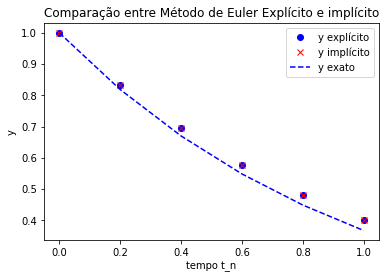

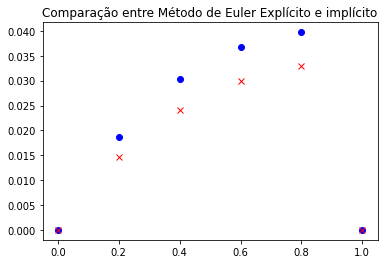

In [22]:
'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = 1.
dt = 0.2

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

''''definindo a função exata'''
y_bar = lambda t : np.exp(-t)

y_exp, y_bar, erro = explicit_euler(t, y, y_bar, dt)

y_imp, y_bar_imp, erro_imp = implicit_euler(t, y, y_bar, dt)

plot_compare_euler(t, y_exp, y_imp, y_bar(t), erro, erro_imp)

plt.show()